In [1]:
loadModel(Modelica) 

True

In [11]:
using CSV;
using Pkg; Pkg.add("Plots"); using Plots

 Resolving package versions...
  Updating `/opt/julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.0/Manifest.toml`
 [no changes]


In [30]:
gr()

Plots.GRBackend()

In [25]:
class Pendulum "Planar Pendulum"
   constant Real PI=acos(-1);
   parameter Real m=1, g=9.81, L=0.5;
   Real F;
   output Real x(start=0.5),y(start=0);
   output Real vx,vy;
equation
   m*der(vx)=-(x/L)*F;
   m*der(vy)=-(y/L)*F-m*g;
   der(x)=vx;
   der(y)=vy;
   x^2+y^2=L^2;
end Pendulum;

('Pendulum',)

In [26]:
simulate(Pendulum,stopTime=10,outputFormat="csv")

{'resultFile': '/user/jovyan/work/Pendulum_res.csv', 'simulationOptions': "startTime = 0.0, stopTime = 10.0, numberOfIntervals = 500, tolerance = 1e-06, method = 'dassl', fileNamePrefix = 'Pendulum', options = '', outputFormat = 'csv', variableFilter = '.*', cflags = '', simflags = ''", 'messages': 'LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.\nLOG_SUCCESS       | info    | The simulation finished successfully.\n', 'timeFrontend': 0.3028358999999999, 'timeBackend': 0.0183904, 'timeSimCode': 0.0288784, 'timeTemplates': 0.0572104, 'timeCompile': 1.2168698, 'timeSimulation': 0.5458748, 'timeTotal': 2.1712008}

In [27]:
plot(x,y)

In [28]:
cdata = CSV.read("Pendulum_res.csv");

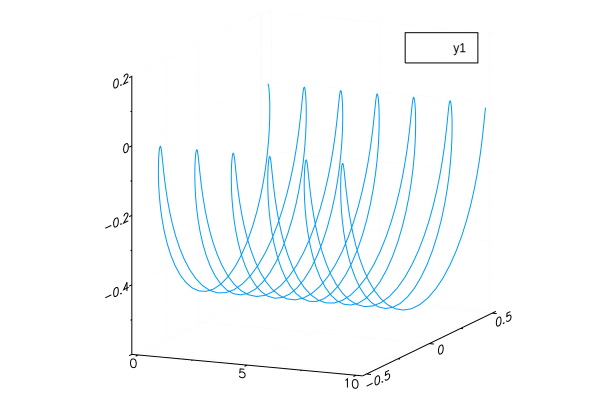

In [31]:
plot(cdata[:time],cdata[:x],cdata[:y])